# Diagram Tests

## Setup

### Imports

In [1]:
# Type imports
from typing import Any, Dict, List, Tuple

# Standard Libraries
from pathlib import Path
from collections import Counter, defaultdict
import math
from math import sqrt, pi, sin, cos, tan, radians
from statistics import mean
from itertools import zip_longest

# Shared Packages
import pandas as pd
import numpy as np
import xlwings as xw

import pygraphviz as pgv
import networkx as nx


In [2]:
from types_and_classes import *

### Matplotlib settings

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Arc
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.font_manager as font_manager

#plt.ion()

#set_matplotlib_formats('svg')

In [4]:
%matplotlib inline

# Example Graph Data

In [5]:
folder=Path.cwd()
name='test_graph'
full_dot_name = name + '.gv'
full_png_name = name + '.png'
full_svg_name = name + '.svg'
dot_path = folder / full_dot_name
png_path = folder / full_png_name
svg_path = folder / full_svg_name


In [6]:
structure_def = [
    {
        'struct_id': 'GTV',
        'roi': 38,
        'structure_type': 'GTV',
        'structure_code': 'GTVp',
        'structure_code_meaning': 'Primary Gross Tumor Volume',
        'structure_code_scheme': '99VMS_STRUCTCODE',
        'color': (255, 0, 0),
        'volume': 8.03,
        'length': 2.6,
        'sup_slice': -0.4,
        'inf_slice': -3,
        'center_of_mass': (-5.36,  9.71, -1.63)
        },{
        'struct_id': 'CTV',
        'roi': 24,
        'structure_type': 'GTV',
        'structure_code': 'ITV',
        'structure_code_meaning': 'Internal Target Volume',
        'structure_code_scheme': '99VMS_STRUCTCODE',
        'color': (255, 255, 0),
        'volume': 34.45,
        'length': 3.6,
        'sup_slice': 0,
        'inf_slice': -3.6,
        'center_of_mass': (-5.34,  9.79, -1.61)
        },{
        'struct_id': 'PTV',
        'roi': 30,
        'structure_type': 'PTV',
        'structure_code': 'PTVp',
        'structure_code_meaning': 'Primary Planning Target Volume',
        'structure_code_scheme': '99VMS_STRUCTCODE',
        'color': (0, 255, 255),
        'volume': 74.649,
        'length': 4.6,
        'sup_slice': 0.6,
        'inf_slice': -4.0,
        'center_of_mass': (-5.36,  9.78, -1.59)
        },{
        'struct_id': 'eval PTV',
        'roi': 41,
        'structure_type': 'PTV',
        'structure_code': 'PTVp',
        'structure_code_meaning': 'Primary Planning Target Volume',
        'structure_code_scheme': '99VMS_STRUCTCODE',
        'color': (0, 255, 255),
        'volume': 74.649,
        'length': 4.6,
        'sup_slice': 0.6,
        'inf_slice': -4.0,
        'center_of_mass': (-5.36,  9.78, -1.59)
        },{
        'struct_id': 'BODY',
        'roi': 1,
        'structure_type': 'EXTERNAL',
        'structure_code': 'BODY',
        'structure_code_meaning': 'Body',
        'structure_code_scheme': '99VMS_STRUCTCODE',
        'color': (0, 255, 0),
        'volume': 28951.626,
        'length': 33.8,
        'sup_slice': 10.6,
        'inf_slice': -23.2,
        'center_of_mass': (-0.95,  9.73, -6.76)
        },{
        'struct_id': 'Lung L',
        'roi': 26,
        'structure_type': 'ORGAN',
        'structure_code': '7310',
        'structure_code_meaning': 'Left lung',
        'structure_code_scheme': 'FMA',
        'color': (224, 255, 255),
        'volume': 1776,
        'length': 24.2,
        'sup_slice': 5.8,
        'inf_slice': -18.4,
        'center_of_mass': (7.08, 10.61, -6.28)
        },{
        'struct_id': 'Lung R',
        'roi': 27,
        'structure_type': 'ORGAN',
        'structure_code': '7309',
        'structure_code_meaning': 'Right lung',
        'structure_code_scheme': 'FMA',
        'color': (255, 218, 185),
        'volume': 2556.676,
        'length': 23.8,
        'sup_slice': 6.6,
        'inf_slice': -17.2,
        'center_of_mass': (-8.09,  8.77, -5.57)
        },{
        'struct_id': 'Lung B',
        'roi': 25,
        'structure_type': 'ORGAN',
        'structure_code': '68877',
        'structure_code_meaning': 'Pair of lungs',
        'structure_code_scheme': 'FMA',
        'color': (218, 165, 32),
        'volume': 4332.676,
        'length': 25,
        'sup_slice': 6.6,
        'inf_slice': -18.4,
        'center_of_mass': (-1.87,  9.52, -5.86)
        },{
        'struct_id': 'Skin',
        'roi': 2,
        'structure_type': 'ORGAN',
        'structure_code': '7163',
        'structure_code_meaning': 'Skin',
        'structure_code_scheme': 'FMA',
        'color': (240, 255, 240),
        'volume': 1726.808,
        'length': 33.8,
        'sup_slice': 10.6,
        'inf_slice': -23.2,
        'center_of_mass': (-0.95,  9.73, -6.76),
        'show': False
        }
    ]

structure_list = []

for node_dict in structure_def:
    roi = node_dict['roi']
    struct_id = node_dict['struct_id']
    structure_ref = {'roi': roi, 'struct_id': struct_id,
                     'Structure': Structure(**node_dict)}
    structure_list.append(structure_ref)

structure_table = pd.DataFrame(structure_list)
structure_table.set_index('roi', inplace=True)

In [7]:
edge_def = [
    {'structures': (1, 2),   'relationship': 'BORDERS_INTERIOR', 'is_logical': False, 'show': True},
    {'structures': (1, 25),  'relationship': 'CONTAINS',         'is_logical': True , 'show': True},
    {'structures': (1, 27),  'relationship': 'CONTAINS',         'is_logical': True , 'show': False},
    {'structures': (1, 26),  'relationship': 'CONTAINS',         'is_logical': True , 'show': False},
    {'structures': (1, 30),  'relationship': 'CONTAINS',         'is_logical': True , 'show': True},
    {'structures': (1, 41),  'relationship': 'CONTAINS',         'is_logical': True , 'show': False},
    {'structures': (1, 24),  'relationship': 'CONTAINS',         'is_logical': True , 'show': False},
    {'structures': (1, 38),  'relationship': 'CONTAINS',         'is_logical': True , 'show': False},
    {'structures': (2, 25),  'relationship': 'DISJOINT',         'is_logical': False, 'show': True},
    {'structures': (2, 27),  'relationship': 'DISJOINT',         'is_logical': False, 'show': False},
    {'structures': (2, 26),  'relationship': 'DISJOINT',         'is_logical': False, 'show': False},
    {'structures': (2, 30),  'relationship': 'SURROUNDS',        'is_logical': False, 'show': False},
    {'structures': (2, 41),  'relationship': 'SURROUNDS',        'is_logical': True , 'show': True},
    {'structures': (2, 24),  'relationship': 'SURROUNDS',        'is_logical': True , 'show': False},
    {'structures': (2, 38),  'relationship': 'SURROUNDS',        'is_logical': True , 'show': False},
    {'structures': (25, 27), 'relationship': 'CONTAINS',         'is_logical': False, 'show': True},
    {'structures': (25, 26), 'relationship': 'CONTAINS',         'is_logical': False, 'show': True},
    {'structures': (25, 30), 'relationship': 'OVERLAPS',         'is_logical': True , 'show': False},
    {'structures': (25, 41), 'relationship': 'CONTAINS',         'is_logical': True , 'show': False},
    {'structures': (25, 24), 'relationship': 'CONTAINS',         'is_logical': True , 'show': False},
    {'structures': (25, 38), 'relationship': 'CONTAINS',         'is_logical': True , 'show': False},
    {'structures': (27, 26), 'relationship': 'DISJOINT',         'is_logical': False, 'show': False},
    {'structures': (27, 30), 'relationship': 'DISJOINT',         'is_logical': False, 'show': False},
    {'structures': (27, 41), 'relationship': 'DISJOINT',         'is_logical': False, 'show': False},
    {'structures': (27, 24), 'relationship': 'DISJOINT',         'is_logical': False, 'show': False},
    {'structures': (27, 38), 'relationship': 'DISJOINT',         'is_logical': False, 'show': False},
    {'structures': (26, 30), 'relationship': 'OVERLAPS',         'is_logical': False, 'show': True},
    {'structures': (26, 41), 'relationship': 'PARTITION',        'is_logical': True , 'show': True},
    {'structures': (26, 24), 'relationship': 'CONTAINS',         'is_logical': True , 'show': False},
    {'structures': (26, 38), 'relationship': 'CONTAINS',         'is_logical': True , 'show': False},
    {'structures': (30, 41), 'relationship': 'PARTITION',        'is_logical': False, 'show': True},
    {'structures': (30, 24), 'relationship': 'CONTAINS',         'is_logical': True , 'show': True},
    {'structures': (30, 38), 'relationship': 'CONTAINS',         'is_logical': True , 'show': True},
    {'structures': (41, 24), 'relationship': 'CONTAINS',         'is_logical': False, 'show': True},
    {'structures': (41, 38), 'relationship': 'CONTAINS',         'is_logical': True , 'show': True},
    {'structures': (24, 38), 'relationship': 'CONTAINS',         'is_logical': False, 'show': True},
    ]


relationship_list = []

for edge_dict in edge_def:
    relationship = Relationship(**edge_dict)
    relationship_type = edge_dict['relationship']
    edge = list(edge_dict['structures']) + [relationship_type, relationship]
    relationship_list.append(edge)
relationship_table = pd.DataFrame(relationship_list)
relationship_table.columns = ['ROI_1', 'ROI_2', 'Relationship Type',
                              'Relationship']
relationship_table.set_index(['ROI_1', 'ROI_2'], inplace=True)

In [8]:
g = StructureDiagram()
g.add_structure_nodes(list(structure_table.Structure))
g.add_structure_edges(relationship_table.Relationship)
g.display_graph.layout(prog='dot')

d:\.conda\envs\StructureRelations\Lib\site-packages\pygraphviz\agraph.py:1405: RuntimeWarning: Warning: pos attribute for edge (27,38) doesn't have 3n+1 points

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


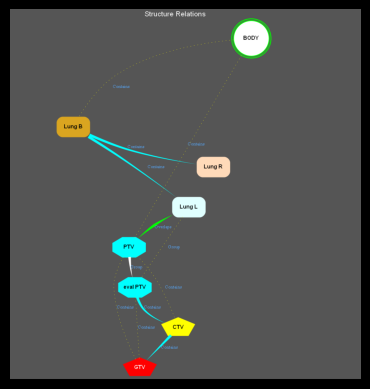

In [9]:
g.display_graph.draw(png_path)
g.display_graph.draw(svg_path)
g.display_graph.write(dot_path)

img = mpimg.imread(png_path)
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')
plt.show()

In [10]:
#from graph_matrix import from_adjacency_matrix
#from multi_graph import plot_multi_edge

## Save and display file with PyGraphVis

In [11]:
G = pgv.AGraph(
    labelloc='t',
    clusterrank='none',
    bgcolor='#555555',
    fontname = 'Helvetica,Arial,sans-serif',
    fontsize = 16,
    fontcolor = 'white',
    label = r'Example Structure Relations\n'
    )

In [12]:
G.node_attr.update(
    fixedsize = 'shape',
    width = 1,
    height = 0.6,
    fontname = 'Helvetica-Bold',
    fontsize = 12,
    labelloc = 'c',
    penwidth = 3,
    style='filled',
    fontcolor = 'black'
    )


In [13]:
G.edge_attr.update(
    color = '#e27dd6ff',
    penwidth = 3,
    style = 'solid',
    arrowhead = 'none',
    arrowtail = 'none',
    labelfloat=False,
    labelfontname = 'Times',
    fontcolor = '#55AAFF',
    fontsize = '10'
    )

In [14]:
node_props = {
    'GTV': {'class': "Target",
            'shape': "pentagon",
            'color': "#ff0000",
            'label': "GTV"},
    'CTV': {'class': 'Target',
            'shape': 'hexagon',
            'color': '#FFFF00',
            'label': 'CTV'},
    'PTV': {'class': 'Target',
            'shape': 'octagon',
            'color': '#00FFFF',
            'label': 'PTV'},
    'eval_PTV': {'class':'Target',
                'shape': 'octagon',
                'color': '#00FFFF',
                'label': 'eval PTV'},
    'Lung_L': {'class': 'OAR',
               'shape': 'rectangle',
               'style': 'rounded, filled',
               'color': '#E0FFFF',
               'label': 'Lung L'},
    'Lung_R': {'class': 'OAR',
               'shape': 'rectangle',
               'style': 'rounded, filled',
               'color': '#FFDAB9',
               'label': 'Lung R'},
    'Lung_B': {'class': 'OAR',
               'shape': 'rectangle',
               'style': 'rounded, filled',
               'color': '#DAA532',
               'label': 'Lung B'},
    'Skin': {'class':'OAR',
             'shape': 'rectangle',
             'style': 'rounded, filled',
             'color': '#F0FFF0',
             'label': 'Skin'},
    'Body': {'class':'External',
             'shape': 'oval',
             'color': '#00ff00',
             'label': 'Body'}}
for node_id, values in node_props.items():
    G.add_node(node_id, **values)

G.add_subgraph(['GTV', 'CTV', 'PTV', 'eval_PTV'], name='Targets', cluster=True)
G.add_subgraph(['Lung_L', 'Lung_R', 'Lung_B', 'Skin'], name='OAR', cluster=True)
G.add_subgraph(['Body'], name='External', cluster=True)

<AGraph b'External' <Swig Object of type 'Agraph_t *' at 0x0000025D27E4BD20>>

In [15]:
edge_props = {
    ('GTV', 'CTV'): {'class': 'Equals',
                     'style': 'tapered',
                     'penwidth': 5,
                     'dir': 'both'},
    ('GTV', 'PTV'): {'class': 'Contain',
                     'style': 'dotted',
                     'penwidth': 1},
    ('GTV', 'eval_PTV'): {'class': 'Contain',
                          'style': 'dotted',
                          'penwidth': 1},
    ('GTV', 'Skin'): {'class': 'Island',
                      'style': 'dotted',
                      'headlabel': 'Embeds',
                      'taillabel': 'Surrounds'},
    ('GTV', 'Lung_L'): {'class': 'Contain',
                        'style': 'dotted',
                        'penwidth': 1},
    ('GTV', 'Lung_B'): {'class': 'Contain',
                        'style': 'dotted',
                        'penwidth': 1},
    ('CTV', 'PTV'): {'class': 'Contain',
                     'style': 'tapered',
                     'penwidth': 5,
                     'dir': 'forward'},
    ('CTV', 'Skin'): {'class': 'Island',
                      'style': 'dotted',
                      'headlabel': 'Embeds',
                      'taillabel': 'Surrounds'},
    ('CTV', 'Lung_L'): {'class': 'Contain',
                        'style': 'dotted',},
    ('PTV', 'eval_PTV'): {'class': 'Group',
                          'style': 'solid',
                          'headlabel': 'Incorporates',
                          'taillabel': 'Partitions'},
    ('PTV', 'Lung_L'): {'label': 'Overlaps',
                        'style': 'bold'},
    ('eval_PTV', 'Lung_L'): {'class': 'Group',
                             'style': 'solid',
                             'headlabel': 'Partitions',
                             'taillabel': 'Incorporates'},
    ('Lung_L', 'Lung_B'): {'class': 'Contain',
                           'style': 'tapered',
                           'penwidth': 5,
                           'dir': 'back'},
    ('Lung_R', 'Lung_B'): {'class': 'Contain',
                           'style': 'tapered',
                           'penwidth': 5,
                           'dir': 'back'},
    ('Body', 'Skin'): {'class': 'Cut-out',
                       'style': 'dashed',
                       'headlabel': 'Partitions',
                       'taillabel': 'Incorporates'},
    ('Body', 'Lung_L'): {'class': 'Contain',
                         'style': 'tapered',
                         'penwidth': 5,
                         'dir': 'forward'},
    ('Body', 'Lung_R'): {'class': 'Contain',
                         'style': 'tapered',
                         'penwidth': 5,
                         'dir': 'forward'},
    ('Body', 'Lung_B'): {'class': 'Contain',
                         'style': 'tapered',
                         'penwidth': 5,
                         'dir': 'forward'},
}
for edge_id, values in edge_props.items():
    G.add_edge(edge_id[0], edge_id[1], **values)


In [16]:
G.layout(prog='dot')

d:\.conda\envs\StructureRelations\Lib\site-packages\pygraphviz\agraph.py:1405: RuntimeWarning: 
(process:3304): Pango-WARNING **: 16:52:22.446: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


d:\.conda\envs\StructureRelations\Lib\site-packages\pygraphviz\agraph.py:1405: RuntimeWarning: 
(process:15980): Pango-WARNING **: 16:52:22.621: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
d:\.conda\envs\StructureRelations\Lib\site-packages\pygraphviz\agraph.py:1405: RuntimeWarning: 
(process:11300): Pango-WARNING **: 16:52:22.700: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


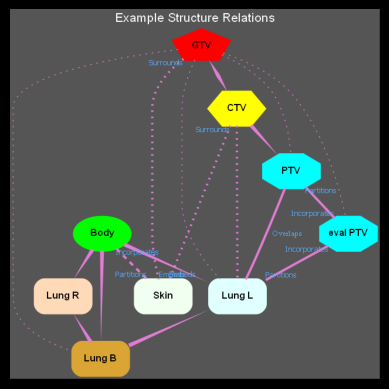

In [17]:
folder=Path.cwd()
name='test_graph'
full_dot_name = name + '.gv'
full_png_name = name + '.png'
full_svg_name = name + '.svg'
dot_path = folder / full_dot_name
png_path = folder / full_png_name
svg_path = folder / full_svg_name

G.draw(png_path)
G.draw(svg_path)
img = mpimg.imread(png_path)
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')
plt.show()

In [18]:
print(G.to_string())

strict graph "" {
	graph [bb="0,0,465,469",
		bgcolor="#555555",
		clusterrank=none,
		fontcolor=white,
		fontname="Helvetica,Arial,sans-serif",
		fontsize=16,
		label="Example Structure Relations\n",
		labelloc=t,
		lheight=0.25,
		lp="232.5,456",
		lwidth=2.85
	];
	node [fixedsize=shape,
		fontcolor=black,
		fontname="Helvetica-Bold",
		fontsize=12,
		height=0.6,
		label="\N",
		labelloc=c,
		penwidth=3,
		style=filled,
		width=1
	];
	edge [arrowhead=none,
		arrowtail=none,
		color="#e27dd6ff",
		fontcolor="#55AAFF",
		fontsize=10,
		labelfloat=False,
		labelfontname=Times,
		penwidth=3,
		style=solid
	];
	subgraph OAR {
		graph [cluster=True];
		Lung_L	[class=OAR,
			color="#E0FFFF",
			height=0.59722,
			label="Lung L",
			pos="287,101.5",
			shape=rectangle,
			style="rounded, filled"];
		Lung_R	[class=OAR,
			color="#FFDAB9",
			height=0.59722,
			label="Lung R",
			pos="64,101.5",
			shape=rectangle,
			style="rounded, filled"];
		Lung_B	[class=OAR,
			color="#DAA532",
			height

```json
#CTV -- eval_PTV [label="Contain"]
#CTV -- Lung_B [label="Contain"]
#PTV -- Skin [label="Island"]
#PTV -- Lung_B [label="Overlaps"]
#eval_PTV -- Skin [label="Island"]
#eval_PTV -- Lung_B [label="Contain"]
#Body -- GTV [label="Contain"]
#Body -- CTV [label="Contain"]
#Body -- PTV [label="Contain"]
#Body -- eval_PTV [label="Contain"]
```

```json
GTV [tooltip = "ID: GTV\nROI: 38\n\nVolumeType: GTV\nDicomType: GTV\nCode: GTVp\nLabel: Primary Gross Tumor Volume\nScheme: 99VMS_STRUCTCODE\nVolume: 8.0\nEq Sp Diam: 2.5\nLength: 2.6\nRange: (-0.4, -3.0)"]
CTV [tooltip = "ID: CTV\nROI: 24\nName: Internal Target Volume\nVolumeType: CTV\nDicomType: CTV\nCode: ITV\nLabel: Internal Target Volume\nScheme: 99VMS_STRUCTCODE\nVolume: 34.4\nEq Sp Diam: 4.0\n\nLength: 3.6\nRange: (0.0, -3.6)"]
PTV [tooltip = "ID: PTV\nROI: 30\nName: PTV defined by Radiation Oncologist\nVolumeType: PTV\nDicomType: PTV\nCode: PTVp\nLabel: Primary Planning Target Volume\nScheme: 99VMS_STRUCTCODE\nVolume: 74.6\nEq Sp Diam: 5.2\n\nLength: 4.6\nRange: (0.6, -4.0)"]
Body [tooltip = "ID: Body\nROI: 1\n\nVolumeType: BODY\nDicomType: EXTERNAL\nCode: BODY\nLabel: Body\nScheme: 99VMS_STRUCTCODE\nVolume: 28,951.6\nEq Sp Diam: 38.1\nRadius: 16.5\nLength: 33.8\nRange: (10.6, -23.2)"]
eval_PTV [tooltip = "ID: eval_PTV\nROI: 41\nName: PTV High Risk for dvh\nVolumeType: PTV\nDicomType: PTV\nCode: PTVp\nLabel: Primary Planning Target Volume\nScheme: 99VMS_STRUCTCODE\nVolume: 630.6\nEq Sp Diam: 10.6\n\nLength: 9.8\nRange: (1.4, -8.4)"]
Lung_L [tooltip = "ID: Lung_L\nROI: 26\nName: Left Lung\nVolumeType: Organ\nDicomType: ORGAN\nCode: 7310\nLabel: Left lung\nScheme: FMA\nVolume: 1,776.0\nEq Sp Diam: 15.0\n\nLength: 24.2\nRange: (5.8, -18.4)"]
Lung_R [tooltip = "ID: Lung_R\nROI: 27\nName: Right Lung\nVolumeType: Organ\nDicomType: ORGAN\nCode: 7309\nLabel: Right lung\nScheme: FMA\nVolume: 2,556.7\nEq Sp Diam: 17.0\n\nLength: 23.8\nRange: (6.6, -17.2)"]
Lung_B [tooltip = "ID: Lung_B\nROI: 25\nName: Both Lungs\nVolumeType: Organ\nDicomType: ORGAN\nCode: 68877\nLabel: Pair of lungs\nScheme: FMA\nVolume: 4,332.7\nEq Sp Diam: 20.2\n\nLength: 25.0\nRange: (6.6, -18.4)"]
Skin [tooltip = "ID: Skin\n\nName: Skin\nVolumeType: Organ\nDicomType: Organ\nCode: 7163\nLabel: Skin\nScheme: FMA\nVolume: 1,072.3\n\n\nLength: 33.8\nRange: (10.6, -23.2)"]
```

```json
graph StructureSet {
    graph [labelloc = t, 
          clusterrank=none, 
          bgcolor="#555555",
          fontname = "Helvetica,Arial,sans-serif", 
          fontsize = 16, 
          fontcolor = "white"
          ]
    node [fixedsize = "shape",
          width = 1,
          height = .6,
          fontname = "Helvetica-Bold",
          fontsize = 12,
          labelloc = "c",
          penwidth = 3,
          style="filled",
          fontcolor = "black"
          ]
    edge [color = "#e27dd6ff",
          penwidth = 3,
          style = "solid",
          arrowhead = "none",
          arrowtail = "none",
          labelfloat=false,
          labelfontname = "Times",
          fontcolor = "#55AAFF",
          fontsize = "10"
          ]
    subgraph Targets {
        cluster = true;
        GTV [class = "Target", shape = "pentagon", color = "#ff0000", label = "GTV"]
        CTV [class= "Target", shape = "hexagon", color = "#FFFF00" label = "CTV"]
        PTV [class= "Target", shape = "octagon", color = "#00FFFF", label = "PTV"]
        eval_PTV [class= "Target", shape = "octagon" color = "#00FFFF" label = "eval PTV"]
        }
    subgraph OAR {cluster = true; 
        node [shape = "rectangle" style="rounded, filled"]        
        Lung_L [class= "OAR", color = "#E0FFFF", label = "Lung L"]
        Lung_R [class= "OAR", color = "#FFDAB9" label = "Lung R"]
        Lung_B [class= "OAR", color = "#DAA532", label = "Lung B"]
        Skin [class= "OAR", color = "#F0FFF0", label = "Skin"]
        }
    subgraph External {cluster = true;
        Body [class= "External", shape = "oval", color = "#00ff00", label = "Body"]
        }
graph [label = "Example Structure Relations\n"]

GTV -- CTV [class = "Equals", style = "tapered", penwidth="5", dir=both]
GTV -- PTV [class = "Contain", style = "dotted",  penwidth=1]
GTV -- eval_PTV [class = "Contain", style = "dotted", penwidth=1]
GTV -- Skin [class = "Island", style = "dotted", headlabel="Embeds", taillabel="Surrounds"]
GTV -- Lung_L [class = "Contain", style = "dotted", penwidth=1]
GTV -- Lung_B [class = "Contain", style = "dotted", penwidth=1]
CTV -- PTV [class = "Contain", style = "tapered", penwidth="5", dir=forward]
#CTV -- eval_PTV [label="Contain"]
CTV -- Skin [class = "Island", style = "dotted", headlabel="Embeds", taillabel="Surrounds"]
CTV -- Lung_L [class = "Contain", style = "dotted",]
#CTV -- Lung_B [label="Contain"]
PTV -- eval_PTV [class = "Group", style = "solid", headlabel="Incorporates", taillabel="Partitions"]
#PTV -- Skin [label="Island"]
PTV -- Lung_L [label="Overlaps", style = "bold"]
#PTV -- Lung_B [label="Overlaps"]
#eval_PTV -- Skin [label="Island"]
eval_PTV -- Lung_L [class = "Group", style = "solid", headlabel="Partitions", taillabel="Incorporates"]
#eval_PTV -- Lung_B [label="Contain"]
Lung_L -- Lung_B [class = "Contain", style = "tapered", penwidth="5", dir=back]
Lung_R -- Lung_B [class = "Contain", style = "tapered", penwidth="5", dir=back]
#Body -- GTV [label="Contain"]
#Body -- CTV [label="Contain"]
#Body -- PTV [label="Contain"]
#Body -- eval_PTV [label="Contain"]
Body -- Skin [class = "Cut-out", style = "dashed",  headlabel="Partitions", taillabel="Incorporates"]
Body -- Lung_L [class = "Contain", style = "tapered", penwidth="5", dir=forward]
Body -- Lung_R [class = "Contain", style = "tapered", penwidth="5", dir=forward]
Body -- Lung_B [class = "Contain", style = "tapered", penwidth="5", dir=forward]
GTV [tooltip = "ID: GTV\nROI: 38\n\nVolumeType: GTV\nDicomType: GTV\nCode: GTVp\nLabel: Primary Gross Tumor Volume\nScheme: 99VMS_STRUCTCODE\nVolume: 8.0\nEq Sp Diam: 2.5\nLength: 2.6\nRange: (-0.4, -3.0)"]
CTV [tooltip = "ID: CTV\nROI: 24\nName: Internal Target Volume\nVolumeType: CTV\nDicomType: CTV\nCode: ITV\nLabel: Internal Target Volume\nScheme: 99VMS_STRUCTCODE\nVolume: 34.4\nEq Sp Diam: 4.0\n\nLength: 3.6\nRange: (0.0, -3.6)"]
PTV [tooltip = "ID: PTV\nROI: 30\nName: PTV defined by Radiation Oncologist\nVolumeType: PTV\nDicomType: PTV\nCode: PTVp\nLabel: Primary Planning Target Volume\nScheme: 99VMS_STRUCTCODE\nVolume: 74.6\nEq Sp Diam: 5.2\n\nLength: 4.6\nRange: (0.6, -4.0)"]
Body [tooltip = "ID: Body\nROI: 1\n\nVolumeType: BODY\nDicomType: EXTERNAL\nCode: BODY\nLabel: Body\nScheme: 99VMS_STRUCTCODE\nVolume: 28,951.6\nEq Sp Diam: 38.1\nRadius: 16.5\nLength: 33.8\nRange: (10.6, -23.2)"]
eval_PTV [tooltip = "ID: eval_PTV\nROI: 41\nName: PTV High Risk for dvh\nVolumeType: PTV\nDicomType: PTV\nCode: PTVp\nLabel: Primary Planning Target Volume\nScheme: 99VMS_STRUCTCODE\nVolume: 630.6\nEq Sp Diam: 10.6\n\nLength: 9.8\nRange: (1.4, -8.4)"]
Lung_L [tooltip = "ID: Lung_L\nROI: 26\nName: Left Lung\nVolumeType: Organ\nDicomType: ORGAN\nCode: 7310\nLabel: Left lung\nScheme: FMA\nVolume: 1,776.0\nEq Sp Diam: 15.0\n\nLength: 24.2\nRange: (5.8, -18.4)"]
Lung_R [tooltip = "ID: Lung_R\nROI: 27\nName: Right Lung\nVolumeType: Organ\nDicomType: ORGAN\nCode: 7309\nLabel: Right lung\nScheme: FMA\nVolume: 2,556.7\nEq Sp Diam: 17.0\n\nLength: 23.8\nRange: (6.6, -17.2)"]
Lung_B [tooltip = "ID: Lung_B\nROI: 25\nName: Both Lungs\nVolumeType: Organ\nDicomType: ORGAN\nCode: 68877\nLabel: Pair of lungs\nScheme: FMA\nVolume: 4,332.7\nEq Sp Diam: 20.2\n\nLength: 25.0\nRange: (6.6, -18.4)"]
Skin [tooltip = "ID: Skin\n\nName: Skin\nVolumeType: Organ\nDicomType: Organ\nCode: 7163\nLabel: Skin\nScheme: FMA\nVolume: 1,072.3\n\n\nLength: 33.8\nRange: (10.6, -23.2)"]
}
```

In [19]:
structure_set_graph_str = '''
graph StructureSet {
    graph [labelloc = t,
          clusterrank=none,
          bgcolor="#555555",
          fontname = "Helvetica,Arial,sans-serif",
          fontsize = 16,
          fontcolor = "white"
          ]
    node [fixedsize = "shape",
          width = 1,
          height = .6,
          fontname = "Helvetica-Bold",
          fontsize = 12,
          fontcolor = "black"
          labelloc = "c",
          nojustify = True,
          style="filled",
          penwidth = 3,
          ]
    edge [color = "#e27dd6ff",
          style = "solid",
          penwidth = 3,
          arrowhead = "none",
          arrowtail = "none",
          labelfloat=false,
          labelfontname = "Cambria",
          fontsize = "10"
          fontcolor = "#55AAFF",
          ]
    subgraph Targets {
        cluster = true;
        GTV [class = "Target", shape = "pentagon", color = "#ff0000", label = "GTV"]
        CTV [class= "Target", shape = "hexagon", color = "#FFFF00" label = "CTV"]
        PTV [class= "Target", shape = "octagon", color = "#00FFFF", label = "PTV"]
        eval_PTV [class= "Target", shape = "octagon" color = "#00FFFF" label = "eval PTV"]
        }
    subgraph OAR {cluster = true;
        node [shape = "rectangle" style="rounded, filled"]
        Lung_L [class= "OAR", color = "#E0FFFF", label = "Lung L"]
        Lung_R [class= "OAR", color = "#FFDAB9" label = "Lung R"]
        Lung_B [class= "OAR", color = "#DAA532", label = "Lung B"]
        Skin [class= "OAR", color = "#F0FFF0", label = "Skin"]
        }
    subgraph External {cluster = true;
        Body [class= "External", shape = "oval", color = "#00ff00", label = "Body"]
        }
graph [label = "Example Structure Relations\n"]

GTV -- CTV [class = "Equals", style = "tapered", penwidth="5", dir=both]
GTV -- PTV [class = "Contain", style = "dotted",  penwidth=1]
GTV -- eval_PTV [class = "Contain", style = "dotted", penwidth=1]
GTV -- Skin [class = "Island", style = "dotted", headlabel="Embeds", taillabel="Surrounds"]
GTV -- Lung_L [class = "Contain", style = "dotted", penwidth=1]
GTV -- Lung_B [class = "Contain", style = "dotted", penwidth=1]
CTV -- PTV [class = "Contain", style = "tapered", penwidth="5", dir=forward]
#CTV -- eval_PTV [label="Contain"]
CTV -- Skin [class = "Island", style = "dotted", headlabel="Embeds", taillabel="Surrounds"]
CTV -- Lung_L [class = "Contain", style = "dotted",]
#CTV -- Lung_B [label="Contain"]
PTV -- eval_PTV [class = "Group", style = "solid", headlabel="Incorporates", taillabel="Partitions"]
#PTV -- Skin [label="Island"]
PTV -- Lung_L [label="Overlaps", style = "bold"]
#PTV -- Lung_B [label="Overlaps"]
#eval_PTV -- Skin [label="Island"]
eval_PTV -- Lung_L [class = "Group", style = "solid", headlabel="Partitions", taillabel="Incorporates"]
#eval_PTV -- Lung_B [label="Contain"]
Lung_L -- Lung_B [class = "Contain", style = "tapered", penwidth="5", dir=back]
Lung_R -- Lung_B [class = "Contain", style = "tapered", penwidth="5", dir=back]
#Body -- GTV [label="Contain"]
#Body -- CTV [label="Contain"]
#Body -- PTV [label="Contain"]
#Body -- eval_PTV [label="Contain"]
Body -- Skin [class = "Cut-out", style = "dashed",  headlabel="Partitions", taillabel="Incorporates"]
Body -- Lung_L [class = "Contain", style = "tapered", penwidth="5", dir=forward]
Body -- Lung_R [class = "Contain", style = "tapered", penwidth="5", dir=forward]
Body -- Lung_B [class = "Contain", style = "tapered", penwidth="5", dir=forward]
GTV [tooltip = "ID: GTV\r\nROI: 38\r\n\r\nVolumeType: GTV\r\nDicomType: GTV\r\nCode: GTVp\r\nLabel: Primary Gross Tumor Volume\r\nScheme: 99VMS_STRUCTCODE\r\nVolume: 8.0\r\nEq Sp Diam: 2.5\r\nLength: 2.6\r\nRange: (-0.4, -3.0)"]
CTV [tooltip = "ID: CTV\r\nROI: 24\r\nName: Internal Target Volume\r\nVolumeType: CTV\r\nDicomType: CTV\r\nCode: ITV\r\nLabel: Internal Target Volume\r\nScheme: 99VMS_STRUCTCODE\r\nVolume: 34.4\r\nEq Sp Diam: 4.0\r\n\r\nLength: 3.6\r\nRange: (0.0, -3.6)"]
PTV [tooltip = "ID: PTV\r\nROI: 30\r\nName: PTV defined by Radiation Oncologist\r\nVolumeType: PTV\r\nDicomType: PTV\r\nCode: PTVp\r\nLabel: Primary Planning Target Volume\r\nScheme: 99VMS_STRUCTCODE\r\nVolume: 74.6\r\nEq Sp Diam: 5.2\r\n\r\nLength: 4.6\r\nRange: (0.6, -4.0)"]
Body [tooltip = "ID: Body\r\nROI: 1\r\n\r\nVolumeType: BODY\r\nDicomType: EXTERNAL\r\nCode: BODY\r\nLabel: Body\r\nScheme: 99VMS_STRUCTCODE\r\nVolume: 28,951.6\r\nEq Sp Diam: 38.1\r\nRadius: 16.5\r\nLength: 33.8\r\nRange: (10.6, -23.2)"]
eval_PTV [tooltip = "ID: eval_PTV\r\nROI: 41\r\nName: PTV High Risk for dvh\r\nVolumeType: PTV\r\nDicomType: PTV\r\nCode: PTVp\r\nLabel: Primary Planning Target Volume\r\nScheme: 99VMS_STRUCTCODE\r\nVolume: 630.6\r\nEq Sp Diam: 10.6\r\n\r\nLength: 9.8\r\nRange: (1.4, -8.4)"]
Lung_L [tooltip = "ID: Lung_L\r\nROI: 26\r\nName: Left Lung\r\nVolumeType: Organ\r\nDicomType: ORGAN\r\nCode: 7310\r\nLabel: Left lung\r\nScheme: FMA\r\nVolume: 1,776.0\r\nEq Sp Diam: 15.0\r\n\r\nLength: 24.2\r\nRange: (5.8, -18.4)"]
Lung_R [tooltip = "ID: Lung_R\r\nROI: 27\r\nName: Right Lung\r\nVolumeType: Organ\r\nDicomType: ORGAN\r\nCode: 7309\r\nLabel: Right lung\r\nScheme: FMA\r\nVolume: 2,556.7\r\nEq Sp Diam: 17.0\r\n\r\nLength: 23.8\r\nRange: (6.6, -17.2)"]
Lung_B [tooltip = "ID: Lung_B\r\nROI: 25\r\nName: Both Lungs\r\nVolumeType: Organ\r\nDicomType: ORGAN\r\nCode: 68877\r\nLabel: Pair of lungs\r\nScheme: FMA\r\nVolume: 4,332.7\r\nEq Sp Diam: 20.2\r\n\r\nLength: 25.0\r\nRange: (6.6, -18.4)"]
Skin [tooltip = "ID: Skin\r\n\r\nName: Skin\r\nVolumeType: Organ\r\nDicomType: Organ\r\nCode: 7163\r\nLabel: Skin\r\nScheme: FMA\r\nVolume: 1,072.3\r\n\r\n\r\nLength: 33.8\r\nRange: (10.6, -23.2)"]
}
'''
g = pgv.AGraph(structure_set_graph_str)


In [20]:
g.layout(prog='dot')

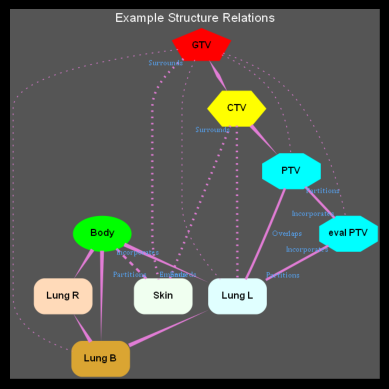

In [21]:
folder=Path.cwd()
name='test_graph'
full_dot_name = name + '.dot'
full_png_name = name + '.png'
full_svg_name = name + '.svg'
dot_path = folder / full_dot_name
png_path = folder / full_png_name
svg_path = folder / full_svg_name

g.draw(png_path)
g.draw(svg_path)
g.write(dot_path)
img = mpimg.imread(png_path)
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')
plt.show()